### 목표 : 미니배치기반 기계학습 진행 실습
- 확률적 경사하강법 기반의 알고리즘 적용 모델
- 데이터의 처음부터 끝까지(에포크) 학습 후 가중치(W)와 절편(b)을 업데이트 하는 방식에서 에포크를 미니배치 크기만큼 나누어서 학습 후 가중치(W)와 절편(b)을 업데이트 한다.
- 장점
    * 온라인 학습 즉, 점진적 학습 가능 => partial_fit() : 기존 모델에 추가로 1에포크 학습
    * 기존의 다른 모델보다 속도가 빠름 => 랜덤으로 한개 데이처 추출 후 학습 진행
    * 조기 학습 중단 설정 가능
- 단점
    * 전체 학습보다 정확도는 떨어질 수 있음

(1) 모듈 로딩 및 데이터 준비 <hr>

In [1]:
# 모듈 로딩
import pandas as pd

data = '../DATA/fish.csv'

In [2]:
# 데이터 로딩
fishDF = pd.read_csv(data)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


(2) 데이터 전처리 => 학습을 위한 가공 <hr>

[2-1] 피처 /타겟 분리

In [8]:
featureDF = fishDF[fishDF.columns[1:]]
targetSR = fishDF.Species

print(f'피처 => {featureDF.shape}, 타겟 => {targetSR.shape}')

피처 => (159, 5), 타겟 => (159,)


[2-2] 학습 / 테스트 데이터셋 분리

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, stratify = targetSR, random_state = 41)

In [10]:
print(f'[훈련용] => {X_train.shape}, 타겟 => {y_train.shape}')
print(f'[훈련용] => {X_test.shape}, 타겟 => {y_test.shape}')

[훈련용] => (119, 5), 타겟 => (119,)
[훈련용] => (40, 5), 타겟 => (40,)


[2-3] 피처 스케일링

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
# 훈련용 데이터셋 스케일링
scaled_X_train = scaler.transform(X_train)

# 테스트용 데이터셋 스케일링
scaled_X_test = scaler.transform(X_test)

[3] 학습 진행 <hr>
- 학습 방법 : 확률적 경사하강법(SGD)기반의 분류

In [66]:
# 모델 인스턴스 생성
from sklearn.linear_model import SGDClassifier

model1 = SGDClassifier(random_state = 41, verbose = 0, loss = 'log_loss', alpha = 0.5)
model1.fit(scaled_X_train, y_train)

SGDClassifier(alpha=0.5, loss='log_loss', random_state=41)

In [67]:
train_score1 = model1.score(scaled_X_train, y_train)
test_score1 = model1.score(scaled_X_test, y_test)

In [68]:
print(f'[기본 SGD] 학습 점수 : {train_score1}, 테스트 점수 : {test_score1}')

[기본 SGD] 학습 점수 : 0.5126050420168067, 테스트 점수 : 0.5


In [31]:
# 학습 후 설정된 파라미터 즉 모델 파라미터
print(f'n_iter_ : {model1.n_iter_}')

n_iter_ : 1000


- 1에포크씩 점진적으로 학습 진행 => partial_fit()

In [44]:
# 모델 인스턴스 생성
model2 = SGDClassifier(loss = 'log_loss')
model2.partial_fit(scaled_X_train, y_train, y_train.unique())

SGDClassifier(loss='log_loss')

In [45]:
train_score2 = model2.score(scaled_X_train, y_train)
test_score2 = model2.score(scaled_X_test, y_test)

In [46]:
print(f'[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}')

[기본 SGD] 학습 점수 : 0.5630252100840336, 테스트 점수 : 0.5


In [58]:
train_score, test_score = [], []
for n in range(1, 100):
    model2.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score2 = model2.score(scaled_X_train, y_train)
    test_score2 = model2.score(scaled_X_test, y_test)
    print(f'[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}\n')
    train_score.append(train_score2)
    test_score.append(test_score2)
    if test_score2 > 0.90 and abs(test_score2 - train_score2) >= 0.03:
        break 

[기본 SGD] 학습 점수 : 0.8991596638655462, 테스트 점수 : 0.9

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.9159663865546218, 테스트 점수 : 0.9

[기본 SGD] 학습 점수 : 0.8571428571428571, 테스트 점수 : 0.85

[기본 SGD] 학습 점수 : 0.8571428571428571, 테스트 점수 : 0.875

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.907563025210084, 테스트 점수 : 0.875

[기본 SGD] 학습 점수 : 0.9327731092436975, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.907563025210084, 테스트 점수 : 0.9

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.9327731092436975, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.9327731092436975, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.925

[기본 SGD] 학습 점수 : 0.9495798319327731, 테스트 점수 : 0.95

[기본 SGD] 학습 점수 : 0.8319327731092437, 테스트 점수 : 0.75

[기본 SGD] 학습 점수 : 0.9411764705882353, 테스트 점수 : 0.95

[기본 SGD]

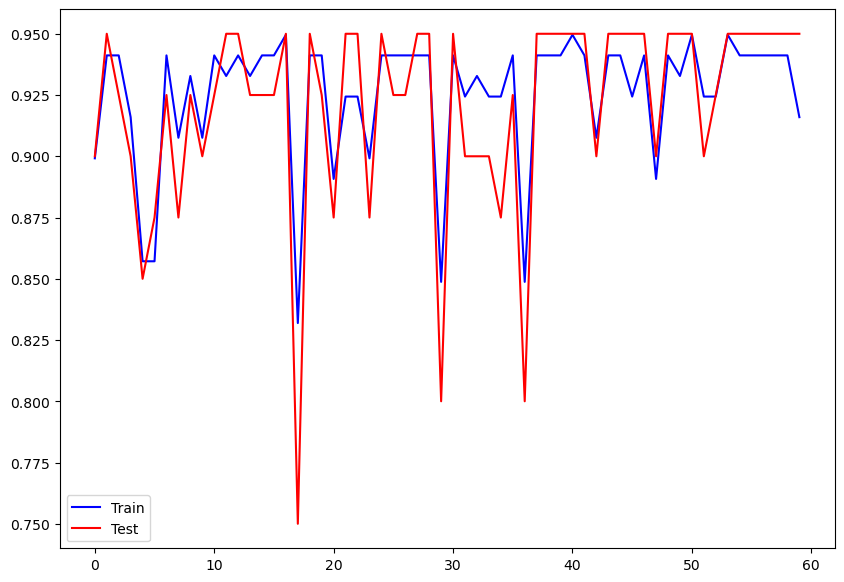

In [59]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.plot(train_score, 'b-', label = 'Train')
plt.plot(test_score, 'r-', label = 'Test')
plt.legend()
plt.show()
